In [1]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
%load_ext autoreload
%autoreload 2

In [26]:
#Standard imports
import os
import pickle
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data
from src.models.train_model import store_model_and_results, print_model_results, load_model_results, load_pickled_models

In [4]:
pd.set_option('display.max_columns', 100)

# Load Featurized Data

In [5]:
X_train, y_train = load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Load model Results

In [24]:
model_results = load_model_results()

In [25]:
model_results

,accuracy,f1,model_filename,model_string,precision,recall,roc_auc
0,0.797880,NaN,2266940982478671616.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",NaN,NaN,NaN
1,0.797880,NaN,423662964844168448.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",NaN,NaN,NaN
2,0.802534,0.802534,331554610981076992.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.802534,0.802534,0.802534


# Load last model

In [27]:
model = load_pickled_models('331554610981076992.pkl')

In [28]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Plot a sigmoid

In [ ]:
f(x) = 1 / (1 + e(-x))

In [12]:
def sigmoid(x):
    return 1/(1+np.e ** (-1*x))

In [17]:
x=np.linspace(-10,10,1000)
y=sigmoid(x)

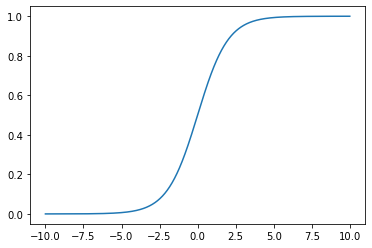

In [18]:
plt.plot(x,y)

# Look at model weights

In [22]:
sorted(list(zip(X_train.columns, model.coef_[0])), key=lambda x: abs(x[1]), reverse=True)

[('Contract_Two year', -0.8478706510430607),
 ('InternetService_Fiber optic', 0.572465869396783),
 ('OnlineSecurity_Yes', -0.5416079634081875),
 ('TechSupport_Yes', -0.4531770597275763),
 ('PhoneService', -0.4510442463627567),
 ('Contract_One year', -0.4267875389827798),
 ('PaperlessBilling', 0.33417911958697727),
 ('MultipleLines_No phone service', 0.2858236366869957),
 ('OnlineBackup_Yes', -0.2382766712286637),
 ('PaymentMethod_Electronic check', 0.22227887296284435),
 ('MultipleLines_Yes', 0.21217046597728817),
 ('StreamingMovies_Yes', 0.20653806300376723),
 ('SeniorCitizen', 0.16759210869459923),
 ('Dependents', -0.1436457255525538),
 ('PaymentMethod_Credit card (automatic)', -0.13937556434143844),
 ('InternetService_No', -0.1134584579667457),
 ('OnlineSecurity_No internet service', -0.1134584579667457),
 ('OnlineBackup_No internet service', -0.1134584579667457),
 ('DeviceProtection_No internet service', -0.1134584579667457),
 ('TechSupport_No internet service', -0.1134584579667457

In [19]:
model.coef_[0]

array([ 6.67972619e-02,  1.67592109e-01,  4.21097897e-02, -1.43645726e-01,
       -6.16510778e-02, -4.51044246e-01,  3.34179120e-01,  4.50491707e-03,
        3.25128973e-04,  2.85823637e-01,  2.12170466e-01,  5.72465869e-01,
       -1.13458458e-01, -1.13458458e-01, -5.41607963e-01, -1.13458458e-01,
       -2.38276671e-01, -1.13458458e-01, -7.49193888e-02, -1.13458458e-01,
       -4.53177060e-01, -1.13458458e-01,  7.59919714e-02, -1.13458458e-01,
        2.06538063e-01, -4.26787539e-01, -8.47870651e-01, -1.39375564e-01,
        2.22278873e-01, -5.11069803e-02])

# Caveats
1. Our features have different scales. In particular, tenure has a scale of 1-70 while most other columns have a scale of 0-1. Also, TotalCharges have benn larger scales. We cannot currently say which features are most important because we didn't scale our features.
2. Many of our features are highly or perfectly correlated. This also means we cannot tell which features are most important, because of the effects of multicollinearity.